# PROBLEM STATEMENT

 1. In this Capstone project, the problem can be solved by creating different Machine Learning Models that can identify with reasonable Accuracy.

 2. The problem statement is about the Corona Virus Pandemic where we need to find whether He/She is affected by Corona Virus or not.

 3. The end goal of the project is to determine whether Corona is Positive or Negative. 

 4. This will be Treated as Classification problem since the output is either positive or negative.

 5. In this Proposal, I have implemented different ML models to predict whether the Corona is positive or negative.

 6. The Model created is furthur splitted into Training and Test validation against COVID-19 prediction. The model accuracy will be validated by using evaluation metrics like Precision, Recall, F1-Score, Cross - Validation too. 

**AGENDA OF THE CAPSTONE PROJECT**

**STEP 1 :** **importing necessary libraries for the dataset**

**STEP 2 :** **basic exploration on the dataset** 

**STEP 3 :** **Handling Null or NaN or None values**

**STEP 4 :** **performing encoding techniques on columns if applicable**

**STEP 5 :** **Visualizing the data using different graphs**

**STEP 6 :** **Selecting best Features for the dataset**

**STEP 7 :** **performing feature scaling on the selected features**

**STEP 8 :** **Splitting dataset into training and test set for validation**

**STEP 9 :** **Implementing different ML models to see how well it is           predicting**

**STEP 10 :** **evaluating the Models with different evaluation metrics to find best model**

**STEP 1 :** **IMPORTING NECESSARY LIBRARIES FOR THE DATASET** 

In [188]:
# importing necessary libraries for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler    
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score, recall_score, f1_score

**IMPORTING DATASET USING PANDAS**

In [232]:
df = pd.read_csv("corona_tested_006.csv")
df.head()

<ipython-input-232-13cb33ba6ec0>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("corona_tested_006.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [233]:
# creating copy of the dataset

df1 = df.copy()
df1.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


**STEP 2 :** **basic exploration on the dataset**

In [6]:
## shape of data

df1.shape

(278848, 11)

In [8]:
## checking datatypes of each column

df1.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [9]:
## checking info of dataset

df1.info

<bound method DataFrame.info of         Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
0            1  11-03-2020           TRUE  FALSE        TRUE   
1            2  11-03-2020          FALSE   TRUE       FALSE   
2            3  11-03-2020          FALSE   TRUE       FALSE   
3            4  11-03-2020           TRUE  FALSE       FALSE   
4            5  11-03-2020           TRUE  FALSE       FALSE   
...        ...         ...            ...    ...         ...   
278843  278844  30-04-2020          False  False       False   
278844  278845  30-04-2020          False  False       False   
278845  278846  30-04-2020          False  False       False   
278846  278847  30-04-2020          False  False       False   
278847  278848  30-04-2020          False  False       False   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
0                    FALSE    FALSE  negative         None    None   
1                    FALSE    FALSE  positive         None 

**from the above information we can see there are some None values present, and also other value is present which means these data are null values.**

In [10]:
# checking unique values of dataset

df1.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [11]:
# checking columns of the dataset

df1.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [234]:
# dropping duplicate values if present

df1.drop_duplicates()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


**FROM THE DATA, WE CAN SEE THAT THE COLUMNS Ind_ID, Known_contact is not necessary so we can drop that column for the given scenario**

In [235]:
# dropping unnecessary columns 

df1.drop('Ind_ID', axis=1, inplace=True)
df1.drop('Known_contact', axis=1, inplace=True)

In [174]:
df1.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None


In [17]:
# checking uniqueness on each columns 

df1['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [18]:
df1['Fever'].value_counts()

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [19]:
df1['Sore_throat'].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [20]:
df1['Shortness_of_breath'].value_counts()

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

In [21]:
df1['Headache'].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [22]:
df1['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [23]:
df1['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [24]:
df1['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

**SPLITTING DATASET AS TRAINING AND TEST FOR SPECIFIED DATE USING Test_date Column**

In [25]:
df1.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None


In [36]:
df1.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None


In [236]:
df1['Test_date'] = pd.to_datetime(df1['Test_date'])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [237]:
df1.set_index('Test_date', inplace=True)

# Split the dataset into training and test sets based on the date range
train = df1['2020-03-11':'2020-04-15']
test = df1['2020-04-16':'2020-04-30']

<ipython-input-237-0c697e9b7cd3>:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  train = df1['2020-03-11':'2020-04-15']


In [238]:
merged_df1 = pd.concat([train, test], axis=0)

# reset the index
merged_df1 = merged_df1.reset_index(drop=True)

# save the merged dataset as a new CSV file
merged_df1.to_csv('corona1.csv', index=False)

In [239]:
df1 = merged_df1

In [240]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None
1,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None
2,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,None
3,TRUE,TRUE,FALSE,FALSE,FALSE,positive,None,None
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None


In [44]:
df1['Cough_symptoms'].value_counts()

False    120005
FALSE     61924
True      17799
TRUE       9787
None         76
Name: Cough_symptoms, dtype: int64

In [45]:
df1.shape

(209591, 8)

**STEP 3 :**  **Handling Null or NaN or None values**

In [46]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None
1,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None
2,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,None
3,TRUE,TRUE,FALSE,FALSE,FALSE,positive,None,None
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None


In [51]:
df1['Shortness_of_breath'].value_counts()

False    144904
FALSE     63582
TRUE       1026
True         79
Name: Shortness_of_breath, dtype: int64

**AS WE CAN SEE THERE ARE SOME None VALUES AND TRUE FALSE CATEGORY AS DIFFERENT FORMAT SO WE CAN CHANGE THOSE VALUES IN THIS STEP.**

In [48]:
df1.dtypes

Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
dtype: object

In [241]:
# changing None and other with NaN values

df1.replace(to_replace='other', value=np.nan, inplace=True)

In [223]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None
1,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None
2,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,None
3,TRUE,TRUE,FALSE,FALSE,FALSE,positive,None,None
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None


In [229]:
df1['Headache'].value_counts()

False    144839
FALSE     63194
TRUE       1414
True        144
Name: Headache, dtype: int64

In [225]:
df1['Corona'].value_counts()

negative    196392
positive      9955
Name: Corona, dtype: int64

In [56]:
df1['Age_60_above'].value_counts()

No     69628
Yes    13571
Name: Age_60_above, dtype: int64

**STEP 4 :**  **performing encoding techniques on columns if applicable**

In [88]:
df1.isnull().sum()

Cough_symptoms             76
Fever                      78
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                   3244
Age_60_above           126392
Sex                     16644
dtype: int64

In [242]:
df1['Cough_symptoms'] = df1['Cough_symptoms'].str.upper()
df1['Cough_symptoms'] = df1['Cough_symptoms'].fillna('None')
df1['Fever'] = df1['Fever'].fillna('None')
df1['Fever'] = df1['Fever'].str.upper()
df1['Sore_throat'] = df1['Sore_throat'].str.upper()
df1['Shortness_of_breath'] = df1['Shortness_of_breath'].str.upper()
df1['Headache'] = df1['Headache'].str.upper()

In [243]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None
1,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None
2,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,None
3,TRUE,TRUE,FALSE,FALSE,FALSE,positive,None,None
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None


In [247]:
df1.replace(to_replace='NONE', value=np.nan, inplace=True)
df1.replace(to_replace='None', value=np.nan, inplace=True)
df1.replace(to_replace='other', value=np.nan, inplace=True)

In [154]:
df1.isnull().sum()

Cough_symptoms             76
Fever                      78
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                   3244
Age_60_above           126392
Sex                     16644
dtype: int64

In [248]:
df1['Cough_symptoms'].value_counts()

FALSE    61924
TRUE      9787
Name: Cough_symptoms, dtype: int64

In [250]:
df1.drop_duplicates()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,FALSE,FALSE,FALSE,FALSE,FALSE,negative,NaN,NaN
2,FALSE,FALSE,FALSE,FALSE,FALSE,positive,NaN,NaN
3,TRUE,TRUE,FALSE,FALSE,FALSE,positive,NaN,NaN
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,NaN,NaN
5,TRUE,FALSE,TRUE,FALSE,FALSE,negative,NaN,NaN
...,...,...,...,...,...,...,...,...
86897,NaN,NaN,NaN,NaN,NaN,positive,NaN,male
86916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
87179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
94728,NaN,NaN,NaN,NaN,NaN,positive,NaN,NaN


In [251]:
df1['Cough_symptoms'].value_counts()

FALSE    61924
TRUE      9787
Name: Cough_symptoms, dtype: int64

In [252]:
cols_to_encode = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

df1[cols_to_encode] = df1[cols_to_encode].fillna(df1[cols_to_encode].mode().iloc[0])

df_encoded = pd.get_dummies(df1, columns=cols_to_encode, dummy_na=True)

In [253]:
df1 = df_encoded

In [254]:
df1.head()

,Corona,Age_60_above,Sex,Cough_symptoms_FALSE,Cough_symptoms_TRUE,Cough_symptoms_nan,Fever_FALSE,Fever_TRUE,Fever_nan,Sore_throat_FALSE,Sore_throat_TRUE,Sore_throat_nan,Shortness_of_breath_FALSE,Shortness_of_breath_TRUE,Shortness_of_breath_nan,Headache_FALSE,Headache_TRUE,Headache_nan
0,negative,NaN,NaN,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,negative,NaN,NaN,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,positive,NaN,NaN,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,positive,NaN,NaN,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
4,negative,NaN,NaN,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [255]:
df1.drop('Cough_symptoms_nan', axis=1, inplace=True)
df1.drop('Fever_nan', axis=1, inplace=True)
df1.drop('Sore_throat_nan', axis=1, inplace=True)
df1.drop('Shortness_of_breath_nan', axis=1, inplace=True)
df1.drop('Headache_nan', axis=1, inplace=True)

In [256]:
df1.head()

,Corona,Age_60_above,Sex,Cough_symptoms_FALSE,Cough_symptoms_TRUE,Fever_FALSE,Fever_TRUE,Sore_throat_FALSE,Sore_throat_TRUE,Shortness_of_breath_FALSE,Shortness_of_breath_TRUE,Headache_FALSE,Headache_TRUE
0,negative,NaN,NaN,1,0,1,0,1,0,1,0,1,0
1,negative,NaN,NaN,1,0,1,0,1,0,1,0,1,0
2,positive,NaN,NaN,1,0,1,0,1,0,1,0,1,0
3,positive,NaN,NaN,0,1,0,1,1,0,1,0,1,0
4,negative,NaN,NaN,0,1,1,0,1,0,1,0,1,0


In [258]:
df1.drop('Cough_symptoms_TRUE', axis=1, inplace=True)
df1.drop('Fever_TRUE', axis=1, inplace=True)
df1.drop('Sore_throat_TRUE', axis=1, inplace=True)
df1.drop('Shortness_of_breath_TRUE', axis=1, inplace=True)
df1.drop('Headache_TRUE', axis=1, inplace=True)

In [259]:
df1.head()

,Corona,Age_60_above,Sex,Cough_symptoms_FALSE,Fever_FALSE,Sore_throat_FALSE,Shortness_of_breath_FALSE,Headache_FALSE
0,negative,NaN,NaN,1,1,1,1,1
1,negative,NaN,NaN,1,1,1,1,1
2,positive,NaN,NaN,1,1,1,1,1
3,positive,NaN,NaN,0,0,1,1,1
4,negative,NaN,NaN,0,1,1,1,1


In [260]:
df1.rename(columns = {'Cough_symptoms_FALSE' : 'Cough_symptoms'}, inplace = True)
df1.rename(columns = {'Fever_FALSE' : 'Fever'}, inplace = True)
df1.rename(columns = {'Sore_throat_FALSE' : 'Sore_throat'}, inplace = True)
df1.rename(columns = {'Shortness_of_breath_FALSE' : 'Shortness_of_breath'}, inplace = True)
df1.rename(columns = {'Headache_FALSE' : 'Headache'}, inplace = True)

In [261]:
df1.head()

,Corona,Age_60_above,Sex,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
0,negative,NaN,NaN,1,1,1,1,1
1,negative,NaN,NaN,1,1,1,1,1
2,positive,NaN,NaN,1,1,1,1,1
3,positive,NaN,NaN,0,0,1,1,1
4,negative,NaN,NaN,0,1,1,1,1


In [262]:
cols_to_encode = ['Corona', 'Age_60_above', 'Sex']

df1[cols_to_encode] = df1[cols_to_encode].fillna(df1[cols_to_encode].mode().iloc[0])

df_encoded = pd.get_dummies(df1, columns=cols_to_encode, dummy_na=True)

In [263]:
df1 = df_encoded

In [264]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_negative,Corona_positive,Corona_nan,Age_60_above_No,Age_60_above_Yes,Age_60_above_nan,Sex_female,Sex_male,Sex_nan
0,1,1,1,1,1,1,0,0,1,0,0,1,0,0
1,1,1,1,1,1,1,0,0,1,0,0,1,0,0
2,1,1,1,1,1,0,1,0,1,0,0,1,0,0
3,0,0,1,1,1,0,1,0,1,0,0,1,0,0
4,0,1,1,1,1,1,0,0,1,0,0,1,0,0


In [265]:
df1.drop('Corona_nan', axis=1, inplace=True)
df1.drop('Sex_nan', axis=1, inplace=True)
df1.drop('Age_60_above_nan', axis=1, inplace=True)

In [266]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_negative,Corona_positive,Age_60_above_No,Age_60_above_Yes,Sex_female,Sex_male
0,1,1,1,1,1,1,0,1,0,1,0
1,1,1,1,1,1,1,0,1,0,1,0
2,1,1,1,1,1,0,1,1,0,1,0
3,0,0,1,1,1,0,1,1,0,1,0
4,0,1,1,1,1,1,0,1,0,1,0


In [267]:
df1.drop('Corona_positive', axis=1, inplace=True)
df1.drop('Sex_male', axis=1, inplace=True)
df1.drop('Age_60_above_Yes', axis=1, inplace=True)

In [283]:
df1.rename(columns = {'Age_60_above_No' : 'Age_60_above'}, inplace = True)

In [284]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Corona
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,0
3,0,0,1,1,1,1,1,0
4,0,1,1,1,1,1,1,1


In [272]:
col_6 = df1.iloc[:, 5]   # extract the 5th column
df1 = df1.drop(columns=[df1.columns[5]])
df1 = pd.concat([df1, col_6], axis=1)
df1.to_csv('Corona_tested_006.csv', index=False)

In [273]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above_No,Sex,Corona
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,0
3,0,0,1,1,1,1,1,0
4,0,1,1,1,1,1,1,1


**STEP: 5**  **Visualizing the data using different graphs**

<Axes: xlabel='Cough_symptoms', ylabel='count'>

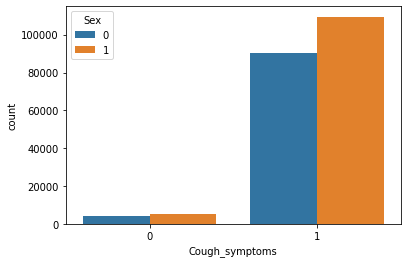

In [278]:
sns.countplot(x = 'Cough_symptoms', hue = 'Sex', data=df1)

**FROM THE ABOVE COUNTPLOT WE CAN SEE THAT USING SEX CATEGORY WE CAN SEE THAT Cough_symptoms IS AFFECTING MORE FOR FEMALES THAN MALE**

In [280]:
# visualizing cough_symptoms using bar plot

counts = df1['Cough_symptoms'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

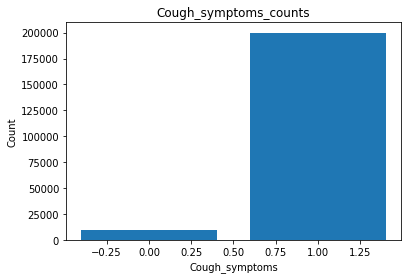

In [281]:
plt.bar(counts.index, counts.values)
plt.title('Cough_symptoms_counts')
plt.xlabel('Cough_symptoms')
plt.ylabel('Count')
plt.show

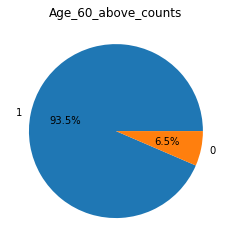

In [285]:
# visualizing Age_60_above persons using pie chart

counts1 = df1['Age_60_above'].value_counts()

plt.pie(counts1.values, labels = counts1.index, autopct = '%1.1f%%')
plt.title('Age_60_above_counts')
plt.show()

**FROM THE CHART WE CAN CLEARLY SEE THAT THERE ARE MORE THAN 90% OF PEOPLE WHO ARE AGED 60 AND ABOVE WHICH GETS EASILY AFFECTED BY CORONA VIRUS**

**STEP 6 :**  **Selecting best Features for the dataset**

**Here i have used SelectKBest, Chi2 as feature extraction method to extract best features that suites for ML models**

**1. SelectKBest is a feature selection method to extract top k features. It works by computing statistical score for each feature of input dataand selecting top k featuresbased on those scores**

**2. Chi2 stands for chi-squared test which calculates relationship between two categorical variables**


In [286]:
from sklearn.feature_selection import SelectKBest, chi2 

X = df1.drop('Corona', axis=1)
y = df1['Corona']

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features_indices = selector.get_support(indices=True)

selected_features_names = X.columns[selected_features_indices]

print(selected_features_names)

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],
      dtype='object')


**FROM THE ABOVE CODE WE CAN SEE IT EXTRACTS TOP 5 FEATURES FOR GIVING INPUT FOR ML MODEL**

**STEP 7 :**  **Splitting dataset into training and test set for validation**

In [287]:
X = df1[['Cough_symptoms', 'Fever', 'Sore_throat', 'Headache', 'Shortness_of_breath']]
y = df1['Corona']
X.head()

,Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,0,0,1,1,1
4,0,1,1,1,1


In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

**STEP 8 :**  **performing feature scaling on the selected features**

In [289]:
from sklearn.preprocessing import MinMaxScaler    
scaler=MinMaxScaler()
scaler

### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

X_test=scaler.transform(X_test)
X_test

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

**FROM THE ABOVE CODE MINMAXSCALER IS USED FOR FEATURE SCALING WHERE MINMAXSCALER IS USED FOR CATEGORICAL VARIABLES FEATURE SCALING**

**STEP 9 :**  **Implementing different ML models to see how well it is predicting**

**A. USING KNN CLASSIFICATION AS FIRST MODEL**

In [290]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [291]:
#Predicting the test set result  
y1_pred= classifier.predict(X_test)  

In [292]:
y1_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [293]:
cm= confusion_matrix(y_test, y1_pred) 
print(cm)
score=accuracy_score(y_test, y1_pred)
print(score)

[[  807  1181]
 [  652 39279]]
0.9562728118514278


**FROM THE ABOVE KNN CLASSIFICATION MODEL, THE MODEL PREDICTS 96% OF ACCURACY OF CORONA POSITIVE CASES IN YEAR 2020:**

**B. USING DECISION TREE AS SECOND CLASSIFICATION MODEL**

In [294]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y2_pred = classification.predict(X_test)

y2_pred

Accuracy = accuracy_score(y_test, y2_pred)
Accuracy

0.9619027171449701

**FROM THE ABOVE DECISION TREE CLASSIFICATION MODEL, THE MODEL PREDICTS 96% OF ACCURACY OF CORONA POSITIVE CASES IN YEAR 2020**

**CROSS VERIFYING DECISION TREE MODEL**

In [295]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y2_pred = classification.predict(X_test)

y2_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [296]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9606 
Decision tree testing set accuracy: 0.9612 


**HERE THE MODEL CROSS VERIFIES AND SHOWS SAME ACCURACY AS PREVIOUS ONE**

**C. USING RANDOMFOREST AS THIRD CLASSIFICATION MODEL**

In [297]:
classifier1= RandomForestClassifier(n_estimators= 12, criterion="entropy")  
classifier1.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=12)

In [298]:
#Predicting the test set result  
y3_pred= classifier1.predict(X_test)

In [299]:
y3_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [300]:
accuracy1 = accuracy_score(y_test, y3_pred)
accuracy1

0.9619027171449701

**FROM THE ABOVE RANDOMFOREST CLASSIFICATION MODEL, THE MODEL PREDICTS 96% OF ACCURACY OF CORONA POSITIVE CASES IN YEAR 2020**

**STEP 10 :**  **evaluating the Models with different evaluation metrics to find best model**

**A : PERFORMING EVALUATION METRICS ON KNN CLASSIFICATION MODEL**

In [301]:
precision = precision_score(y_test, y1_pred)
recall = recall_score(y_test, y1_pred)
f1 = f1_score(y_test, y1_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Precision: 0.97
Recall: 0.98
F1 score: 0.98


**THE MODEL EVALUATES ITS PERFORMANCE BASED ON PRECISION, RECALL, F1 SCORES**

**PRECISION : 97%**

**RECALL : 98%**

**F1 SCORE : 98%**

**PERFORMING CROSS VALIDATION ON KNN CLASSIFICATION MODEL**

In [302]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []

In [303]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8443903719077268, 0.9251157020850231, 0.9700367383940074, 0.9754997852951, 0.9814638102962928]
Avg accuracy : 0.9393012815956301


**FROM THE ABOVE KFold CROSS-VALIDATION METRIC IT SHOWS 0.93930 WHICH IS EQUIVALENT TO 94% OF PREDICTION OF KNN CLASSIFICATION MODEL**

**B. PERFORMING EVALUATION METRICS ON DECISION TREE CLASSIFICATION MODEL**

**PERFORMING HYPERPARAMETER TUNING ON DECISION TREE CLASSIFICATION USING RANDOMSEARCHCV**

In [308]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

clf_dt = RandomizedSearchCV(dt, param_distributions, cv=5, n_iter=20, random_state=42)
clf_dt.fit(X_train, y_train)

print(clf_dt.best_params_)
print(clf_dt.best_score_)

{'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': None, 'criterion': 'gini'}
0.9464910954853037


**PREDICTING DECISION TREE CLASSIFICATION MODEL WITH THE HELP OF THE ABOVE HYPERPARAMETER TUNING**

In [309]:
y4_pred = clf_dt.predict(X_test)

y4_pred

Accuracy2 = accuracy_score(y_test, y4_pred)
Accuracy2

0.9814638102962928